# Language Identifier Using Word Bigrams

In my [previous tutorial](https://github.com/nwams/NLTK-Hands-On-Tutorial/blob/master/2-1-Deriving-N-Grams-from-Text.ipynb) I demonstrate how to use N-grams at the character level for identifying language. However in this tutorial I will work on bigrams at the sentence level. Here bigrams are basically a set of 2 co-occuring words within a given sentence. For example, for the sentence "The cow jumps over the moon" the bigrams would be:
* the cow
* cow jumps
* jumps over
* over the
* the moon

We use bigrams because sometimes word groups provide more benefits than only one word when trying to teach the a machine the true **meaning** of a sentence. You might be wondering when we can apply bigrams? One application is you can use a bigram to make a prediction for a word based on the one before. For example, search engines might use this to predict the next word in an incomplete sentence.

The discussions in [this quora post](https://www.quora.com/What-is-a-bigram-and-a-trigram-layman-explanation-please) do a great job of elaborating on what a bigram is.

In [1]:
import string
from nltk import word_tokenize

# I will create a helper tokenize method
def punct_dig_tokenizer(sentence):
    '''Remove punctionation and digits first then tokenize'''
    # in maketrans() if three arguments are passed, each character in the third argument is mapped to None.
    sentence = sentence.translate(str.maketrans('', '', string.punctuation + string.digits))
    return word_tokenize(sentence.lower())

## 1. Let's Go Step-by-Step to Understand the Process
We'll start by doing step-by-step code demonstrations before finally putting it all together so that we can perform language classification.

**Tokenize at the word level**

In [2]:
example_text = 'Oh, then, I see Queen Mab hath been with you.'
example_tokens_words = punct_dig_tokenizer(example_text)
example_tokens_words

['oh', 'then', 'i', 'see', 'queen', 'mab', 'hath', 'been', 'with', 'you']

**Tokenize at the character level**

In [3]:
example_tokens_chars = list(example_tokens_words[0])
example_tokens_chars

['o', 'h']

**Create Unigrams using NLTK's [ngrams](https://kite.com/python/docs/nltk.ngrams) module**

In [4]:
from nltk import ngrams

example_tokens_words_unigrams = list(ngrams(example_tokens_words, 1))
example_tokens_words_unigrams

[('oh',),
 ('then',),
 ('i',),
 ('see',),
 ('queen',),
 ('mab',),
 ('hath',),
 ('been',),
 ('with',),
 ('you',)]

**Create bigrams; apply left and right padding**

In [5]:
example_tokens_words_bigrams = list(ngrams(example_tokens_words, 2, pad_left=True, pad_right=True,
                                          left_pad_symbol='_', right_pad_symbol='_'))
example_tokens_words_bigrams

[('_', 'oh'),
 ('oh', 'then'),
 ('then', 'i'),
 ('i', 'see'),
 ('see', 'queen'),
 ('queen', 'mab'),
 ('mab', 'hath'),
 ('hath', 'been'),
 ('been', 'with'),
 ('with', 'you'),
 ('you', '_')]

**Let's create a frequency distribution that just counts the occurance of each word**

In [6]:
from nltk import FreqDist
f_dist = FreqDist(example_tokens_words_unigrams) # FreqDist expects an iterable of tokens

for key, value in f_dist.items():
    print(key, ':', value)

('oh',) : 1
('then',) : 1
('i',) : 1
('see',) : 1
('queen',) : 1
('mab',) : 1
('hath',) : 1
('been',) : 1
('with',) : 1
('you',) : 1


**Create a dictionary of the words and their frequencies**

In [7]:
unigram_dict = {}

for k, v in f_dist.items():
    unigram_dict[''.join(k)] = v
    
unigram_dict

{'oh': 1,
 'then': 1,
 'i': 1,
 'see': 1,
 'queen': 1,
 'mab': 1,
 'hath': 1,
 'been': 1,
 'with': 1,
 'you': 1}

**Load the text from the training file**

There are 3 training files. Each file contains meeting minutes from the same meeting but transcribed in different languages...English, French and Italian:
1. _LangId.train.English.txt_
2. _LangId.train.French.txt_
3. _LangId.train.Italian.txt_

In [8]:
file = 'ngram_langid_files/LangId.train.English.txt'

with open(file, encoding='utf8') as f:
    content = f.read().lower()

content.replace('\n', '')[:300] # remove newline symbol and show the first 300 characters

"approval of the minutes of the previous sitting the minutes of yesterday 's sitting have been distributed . are there any comments ? mr president , on monday i made a point of order about president nicole fontaine 's reported comments in the british press regarding her recent visit with her majesty "

**Read in the English unigram pickled dictionary**

In [9]:
import pickle

with open('ngram_langid_files/English.unigram.pickle', 'rb') as handle:
    unigram_enlgish_dict = pickle.load(handle)

unigram_enlgish_dict

{'approval': 3,
 'of': 2769,
 'the': 5699,
 'minutes': 11,
 'previous': 13,
 'sitting': 11,
 'yesterday': 15,
 's': 244,
 'have': 491,
 'been': 193,
 'distributed': 4,
 'are': 571,
 'there': 229,
 'any': 98,
 'comments': 9,
 'mr': 371,
 'president': 270,
 'on': 865,
 'monday': 11,
 'i': 721,
 'made': 61,
 'a': 1343,
 'point': 70,
 'order': 76,
 'about': 93,
 'nicole': 1,
 'fontaine': 4,
 'reported': 2,
 'in': 1668,
 'british': 16,
 'press': 13,
 'regarding': 23,
 'her': 51,
 'recent': 12,
 'visit': 6,
 'with': 449,
 'majesty': 1,
 'queen': 3,
 'elizabeth': 1,
 'ii': 1,
 'labour': 14,
 'member': 111,
 'this': 887,
 'house': 49,
 'miller': 2,
 'repeated': 6,
 'what': 132,
 'were': 82,
 'purported': 1,
 'to': 2490,
 'be': 620,
 'remarks': 1,
 'not': 525,
 'once': 27,
 'but': 240,
 'three': 21,
 'times': 11,
 'tuesday': 8,
 'and': 2040,
 'wednesday': 2,
 'he': 72,
 'sought': 5,
 'drag': 1,
 'into': 78,
 'political': 51,
 'controversy': 2,
 'use': 45,
 'name': 16,
 'score': 2,
 'cheap': 7,


**Read in the English bigram pickled dictionary**

In [10]:
with open('ngram_langid_files/English.bigram.pickle', 'rb') as handle:
    bigram_enlgish_dict = pickle.load(handle)

bigram_enlgish_dict

{'_ approval': 1,
 'approval of': 3,
 'of the': 906,
 'the minutes': 6,
 'minutes of': 2,
 'the previous': 9,
 'previous sitting': 2,
 'sitting the': 1,
 'of yesterday': 2,
 'yesterday s': 5,
 's sitting': 1,
 'sitting have': 1,
 'have been': 65,
 'been distributed': 1,
 'distributed are': 1,
 'are there': 5,
 'there any': 1,
 'any comments': 1,
 'comments mr': 1,
 'mr president': 192,
 'president on': 8,
 'on monday': 10,
 'monday i': 1,
 'i made': 1,
 'made a': 3,
 'a point': 8,
 'point of': 17,
 'of order': 6,
 'order about': 1,
 'about president': 1,
 'president nicole': 1,
 'nicole fontaine': 1,
 'fontaine s': 1,
 's reported': 1,
 'reported comments': 1,
 'comments in': 1,
 'in the': 442,
 'the british': 9,
 'british press': 1,
 'press regarding': 1,
 'regarding her': 1,
 'her recent': 1,
 'recent visit': 2,
 'visit with': 1,
 'with her': 2,
 'her majesty': 1,
 'majesty queen': 1,
 'queen elizabeth': 1,
 'elizabeth ii': 1,
 'ii a': 1,
 'a british': 1,
 'british labour': 1,
 'labo

**Show how many times "of the" occurs in the text**

In [11]:
bigram_enlgish_dict.get('of the') # Get the value of the key

906

**Show the most frequently occurring unigrams**

In [12]:
import operator

english_unigram_freq = sorted(unigram_enlgish_dict.items(), key=operator.itemgetter(1), reverse=True)
english_unigram_freq[:10]

[('the', 5699),
 ('of', 2769),
 ('to', 2490),
 ('and', 2040),
 ('in', 1668),
 ('a', 1343),
 ('is', 1303),
 ('that', 1205),
 ('this', 887),
 ('on', 865)]

## Plot the top 10 English word unigrams

In [13]:
labels, values = zip(*english_unigram_freq[:10])
print(labels, '\n',values)

('the', 'of', 'to', 'and', 'in', 'a', 'is', 'that', 'this', 'on') 
 (5699, 2769, 2490, 2040, 1668, 1343, 1303, 1205, 887, 865)


In [14]:
from numpy import arange
indexes = arange(len(labels))
indexes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

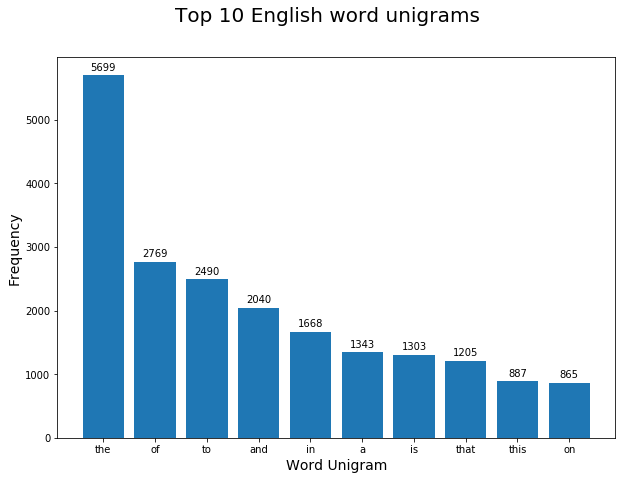

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 7))
ax = fig.gca() # Get current axes. This is the Axes object that is created by default when we make our figure
rectangles = ax.bar(indexes, values) # Make a bar plot.

# Add title and axis labels
fig.suptitle('Top 10 English word unigrams', fontsize=20)
plt.xlabel('Word Unigram', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show value of each bar on top of the bar
for rectangle in rectangles: 
    height = rectangle.get_height()
    ax.text(rectangle.get_x() + rectangle.get_width()/2., 50 + height, '%d' % int(height), ha='center', va='bottom') 
    
# Replace the default numeric ticks on the x-axis with the strings
ax.set_xticks(indexes) # Change the tick numbers on the x-axis to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ax.set_xticklabels(labels)

plt.show()

Notice that the top 10 most frequent English word unigrams contain a lot of **stop words**. Typucally for other NLP applications you would typically prune the stop words in order to extract more meaningful insights. But for the sake of this tutorial, we'll move forward.

# 1. Generating unigram and bigram frequencies for English, French and Italian from training files

Now we'll be putting together some of the code from above to create functions.

In [16]:
def get_ngram_count_dict(tokens, n):
    if n == 1: 
        n_grams = ngrams(tokens, n)
    else:
        n_grams = ngrams(tokens, n, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_')

    f_dist = FreqDist(n_grams)
    ngram_dict = dict()
    
    for k, v in f_dist.items():
        ngram_dict[' '.join(k)] = v
    
    return ngram_dict

**Calls get_ngram_count_dict() to get a unigram and bigram dictionary from file**

In [17]:
def get_unigram_bigram_dicts(file):
    with open(file, encoding='utf8') as f:
        content = f.read()
    tokens = punct_dig_tokenizer(content)
    unigram_dict = get_ngram_count_dict(tokens, 1)
    bigram_dict = get_ngram_count_dict(tokens, 2)
    return (unigram_dict, bigram_dict)

**Dumps unigram and bigram dictionary of training data of given language to .pickle files.**

In [18]:
def dump_pickle(language):
    file = 'ngram_langid_files/LangId.train.' + language + '.txt'
    unigram_dict, bigram_dict = get_unigram_bigram_dicts(file)
    
    with open('ngram_langid_files/' + language + '.unigram.pickle', 'wb') as handle:
        pickle.dump(unigram_dict, handle, protocol=pickle.HIGHEST_PROTOCOL) # Use highest protocol version available
    
    with open('ngram_langid_files/' + language + '.bigram.pickle', 'wb') as handle: 
        pickle.dump(bigram_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
dump_pickle('English')
dump_pickle('French')
dump_pickle('Italian')

**Calculate the number of sentences in each training data file**

Later on we will need to know how many sentences are in the training data, per each language. Because the method that I'll use to calculate probabilities incorporates the probability of the bigram occurring amongst other bigrams that start with the same word.

In the training data each line is a sentence, so that's a convenient format for this purpose. Let's calculate the number of sentences.

In [20]:
lang_list = ['English', 'French', 'Italian']

for lang in lang_list:
    with open('ngram_langid_files/LangId.train.' + lang + '.txt', encoding='utf8') as f:
        for i, l in enumerate(f): 
             pass # a placeholder when a statement is required syntactically, but no code needs to be executed
    if lang == 'English': 
        number_of_sents_en = i + 1
    elif lang == 'French':
        number_of_sents_fr = i + 1
    elif lang == 'Italian':
        number_of_sents_it = i + 1
    
print('NUMBER OF SENTENCES IN TRAINING DATA')
print('English:', number_of_sents_en)
print('French:', number_of_sents_fr)
print('Italian:', number_of_sents_it)

NUMBER OF SENTENCES IN TRAINING DATA
English: 2980
French: 2980
Italian: 2821


# 2. Identifying language for each line of the test file using bigram probabilities

**Let's first calculate the total vocabulary size.**

In [21]:
for lang in lang_list:
    with open('ngram_langid_files/' + lang + '.unigram.pickle', 'rb') as handle:
        if lang == 'English':
            unigram_english_dict = pickle.load(handle)
        elif lang == 'French':
            unigram_french_dict = pickle.load(handle)
        elif lang == 'Italian':
            unigram_italian_dict = pickle.load(handle)
            
total_vocabulary_size = len(unigram_english_dict) + len(unigram_french_dict) + len(unigram_italian_dict)
total_vocabulary_size

22705

**Calculate the size of the bigrams**

In [22]:
# Get the bigram dictionaries, per language
for lang in lang_list:
    with open('ngram_langid_files/' + lang + '.bigram.pickle', 'rb') as handle:
        if lang == 'English':
            bigram_english_dict = pickle.load(handle)
        elif lang == 'French':
            bigram_french_dict = pickle.load(handle)
        elif lang == 'Italian':
            bigram_italian_dict = pickle.load(handle)
            
bigram_vocabulary_size = len(bigram_english_dict) + len(bigram_french_dict) + len(bigram_italian_dict)
bigram_vocabulary_size

118134

Note that there's approximately 5x more bigrams than unigrams. 

## Let's browse through a few elements of each unigram dict to ensure it loaded as expected

In [23]:
from itertools import islice

print('English unigrams')
list(islice(unigram_english_dict, 10)) # Convert dictionary to list and print just a few elements

English unigrams


['approval',
 'of',
 'the',
 'minutes',
 'previous',
 'sitting',
 'yesterday',
 's',
 'have',
 'been']

In [24]:
print('French unigrams')
list(islice(unigram_french_dict, 10))

French unigrams


['approbation',
 'du',
 'procès',
 'verbal',
 'de',
 'la',
 'séance',
 'précédente',
 'le',
 'd']

In [25]:
print('Italian unigrams')
list(islice(unigram_italian_dict, 10))

Italian unigrams


['approvazione',
 'del',
 'processo',
 'verbale',
 'della',
 'seduta',
 'precedente',
 'il',
 'di',
 'ieri']

In [26]:
print('English bigrams') 
list(islice(bigram_english_dict, 10))

English bigrams


['_ approval',
 'approval of',
 'of the',
 'the minutes',
 'minutes of',
 'the previous',
 'previous sitting',
 'sitting the',
 'of yesterday',
 'yesterday s']

In [27]:
print('French bigrams') 
list(islice(bigram_french_dict, 10)) 

French bigrams


['_ approbation',
 'approbation du',
 'du procès',
 'procès verbal',
 'verbal de',
 'de la',
 'la séance',
 'séance précédente',
 'précédente le',
 'le procès']

In [28]:
print('Italian bigrams') 
list(islice(bigram_italian_dict, 10)) 

Italian bigrams


['_ approvazione',
 'approvazione del',
 'del processo',
 'processo verbale',
 'verbale della',
 'della seduta',
 'seduta precedente',
 'precedente il',
 'il processo',
 'seduta di']

# Get the probability of a given bigram belonging to a given language
Given a bigram and a language, what is the probability that the bigram is of that language? I will use this equation below to calculate the probability:

$
\begin{align}
\text{probability} = \frac{ \text{bigram count } + 1} {\text{first word count } + \text{ total vocabulary size}}
\end{align}
$

Now, I'll explain the logic behind the equation. First, you'll notice that there's a "+ 1" in the numerator. That's because we are trying to avoid a situation that makes the numerator 0. If the numerator is 0 that would make the entire probability equal to 0. For example, earlier we used the training data to generate bigrams, but there could be times when we encounter a bigram that was not in the training data and that would make the probability of it being in that language become 0. After all, some bigrams are just rare and even though they don't occur in our training samples they may occur in some of our testing samples. So we want to avoid that. For unseen bigrams we prefer to assign a very small probability of 1/(total vocabulary size). When we zero these out it will be reduced to the following equation:

$
\begin{align}
\text{probability of unseen bigrams} = \frac{1} {\text{ total vocabulary size}}
\end{align}
$

But you should also note that this probability calculation is relatively arbitrary. Because in order to get a true probability we would have to know what other languages are being considered and what their bigram frequencies are. Essentially, this equation that we are using gives us a common sense approach to just get a number which will work for this purpose.

In the denominator, we have both **first word count** and **total vocabulary size**. Why? 

1. We have the **total vocabulary size** of all languagues in the denominator because the larger the vocabulary size is the less significant it is that the bigram appears 'X' many times for this particular language. 

2. Adding **first word count** in the denominator gives us a numerical way to compare this bigram against other bigrams in this language that start with the same word. But keep in mind it is more important to consider how many times a given bigram exists than to consider whether it is the usual bigram given a certain first word. This formula achieves that by putting **bigram count** in the numerator.

Let's go through an example where the bigram is 'le monseiur' and the first word is 'le'. We'll compare English versus French. As we calculated above, the total vocabulary size is 22,705.

For English let's say the bigram 'le monseuir' appears once and 'le' also appears once: 

$
\begin{align}
\text{Probability that 'le monseiur' belongs to English language} = \frac{1 + 1} {1 + 22705}
= 0.000088082
\end{align}
$



For the French language let's say that 'le monseiur' appears 100 times and 'le' appears 100,000 times:

$
\begin{align}
\text{Probability that 'le monseiur' belongs to French language} = \frac{100 + 1} {100000 + 22705}
= 0.00082311234
\end{align}
$

Comparitively speaking the value for French is significantly higher than the English (approximately 9.3x higher).

**Get the probability of a given bigram belonging to the specific bigram dictionary's language.**

In [29]:
def get_bigram_probability(bigram, first_word, bigram_dict, first_word_dict):
    '''Get the probability of a given bigram belonging to the specific bigram dictionary's language. Note that
    first_word is the first word of the word bigram.'''
    bigram_count = bigram_dict.get(bigram)
    if bigram_count is None: 
        bigram_count = 0
        
    first_word_count = first_word_dict.get(first_word)
    if first_word_count is None:
        first_word_count = 0
        
    return (bigram_count + 1) / (first_word_count + total_vocabulary_size)

**Get the probability that a given bigram list belongs to a language (specified by its bigram_dict)**

Notice that the upcoming probabilities will be really small values because when we multiply a lot of small probabilities our final result gets very small; for this reason we could have also used log probabilities instead and add them. [This article](http://practicalcryptography.com/miscellaneous/machine-learning/tutorial-automatic-language-identification-ngram-b/) demonstrates using logarithm to calculate n-gram probabilities instead.

In [30]:
def get_language_probability(bigram_list, first_word, bigram_dict, first_word_dict):
    '''Get the probability that a given bigram list belongs to a language (specified by its bigram_dict)'''
    
    result = 1.0 # set to 1 because soon I'll multiply 'result' by itself to update probability calc
    index = 0
    
    for bigram in bigram_list:
        # To compute the total bigram_list probability, we multiply each of the bigram probabilities.
        result *= get_bigram_probability(bigram, first_word[index], bigram_dict, first_word_dict)
        index += 1
    
    return result

**There is a file that contains 300 correct solutions (a.k.a. ground truth) of the properly classified languages. Let's load that file into a dictionary.** 

In [31]:
solution_dict = dict()

with open('ngram_langid_files/LangId.sol.txt') as f:
    for line in f:
        (key, val) = line.split() # Split a string into a list where each word is a list item
        solution_dict[int(key)] = val # Holds the correct, ground truth, values

# View just 10 key-value pairs from the solution dictionary
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

take(10, solution_dict.items())

[(1, 'Italian'),
 (2, 'English'),
 (3, 'Italian'),
 (4, 'French'),
 (5, 'French'),
 (6, 'English'),
 (7, 'English'),
 (8, 'English'),
 (9, 'French'),
 (10, 'French')]

## Load the test data and make predictions

In [32]:
result_dict = dict() # Hold the results from running the Test data
line_no = 1 # Will be used to iterate the list
correct_counter = 0 # Counter is needed to calculate accuracy
incorrect_line_numbers = [] # Keep track of which line numbers were incorrect guesses
dict_of_test_sentences = dict()

with open('ngram_langid_files/LangId.test.txt', encoding='utf8') as f:
    
    # Operate line by line
    for line in f:
        tokens = punct_dig_tokenizer(line)
        dict_of_test_sentences[line_no] = line # Store each line a dictionary for now, it will be helpful when eyeballing the incorrect classifications later
        bigrams = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_')
        
        '''The original bigram_dict is formatted as an array of tuples like [('_', 'this'), ...] however bigram_list 
        will be re-formatted as a list like ['_ this', ...]'''
        bigram_list = []
        
        first_words = [] # The first words of each bigram
        
        for b in bigrams:
            bigram_list.append(' '.join(b))
            first_words.append(b[0])
            
        english_prob = get_language_probability(bigram_list, first_words, bigram_english_dict, unigram_english_dict)
        french_prob = get_language_probability(bigram_list, first_words, bigram_french_dict, unigram_french_dict)
        italian_prob = get_language_probability(bigram_list, first_words, bigram_italian_dict, unigram_italian_dict)

        max_prob = max(english_prob, french_prob, italian_prob)
        
        # Add whichever language has the highest probability to the result_dict
        if max_prob == english_prob: 
            result_dict[line_no] = 'English'
        elif max_prob == french_prob:
            result_dict[line_no] = 'French'
        else:
            result_dict[line_no] = 'Italian'
        
        # Keep track of out correctly classified guesses, it will be used to calculate accuracy
        if result_dict[line_no] == solution_dict[line_no]: 
            correct_counter += 1
        else:
            incorrect_line_numbers.append(line_no) # Keep track of which line number has incorrectly classified lang
                
        line_no += 1

result_dict # holds the predictions

{1: 'Italian',
 2: 'English',
 3: 'Italian',
 4: 'French',
 5: 'French',
 6: 'English',
 7: 'English',
 8: 'English',
 9: 'French',
 10: 'French',
 11: 'English',
 12: 'Italian',
 13: 'English',
 14: 'English',
 15: 'French',
 16: 'English',
 17: 'French',
 18: 'French',
 19: 'Italian',
 20: 'English',
 21: 'Italian',
 22: 'French',
 23: 'Italian',
 24: 'English',
 25: 'Italian',
 26: 'English',
 27: 'English',
 28: 'English',
 29: 'English',
 30: 'English',
 31: 'English',
 32: 'English',
 33: 'English',
 34: 'French',
 35: 'French',
 36: 'Italian',
 37: 'French',
 38: 'English',
 39: 'French',
 40: 'Italian',
 41: 'Italian',
 42: 'French',
 43: 'Italian',
 44: 'Italian',
 45: 'French',
 46: 'Italian',
 47: 'French',
 48: 'Italian',
 49: 'French',
 50: 'Italian',
 51: 'English',
 52: 'Italian',
 53: 'Italian',
 54: 'Italian',
 55: 'Italian',
 56: 'Italian',
 57: 'Italian',
 58: 'English',
 59: 'French',
 60: 'French',
 61: 'Italian',
 62: 'French',
 63: 'English',
 64: 'Italian',
 65:

## Store the result_dict to file

In [33]:
with open('ngram_langid_files/LangId.result.txt', 'w') as f:
    for (key, val) in result_dict.items():
        f.write(' '.join([str(key), val]) + '\n')

## Calculate the Accuracy

In [34]:
accuracy = (correct_counter / len(solution_dict)) * 100
print('Accuracy: {:2.2f}%'.format(accuracy))

Accuracy: 98.00%


## Incorrectly classified languages

**Let's look at which line numbers that were incorrectly classified.**

In [35]:
print('Line numbers for incorrectly classified languages: {}'.format(str(incorrect_line_numbers)))

Line numbers for incorrectly classified languages: [24, 87, 187, 191, 247, 279]


**I'm just printing in a format that's humanly-friendly**

In [36]:
incorrectly_classified = dict()

print('Incorrect language classifications by line number', '\n', { incorr_line: result_dict[incorr_line] for incorr_line in incorrect_line_numbers }, '\n')

# Create a filtered dictionary that only includes sentences that were incorrectly classified
print('Incorrectly classified sentences by line number')
incorrectly_classified = {incorr_line: dict_of_test_sentences[incorr_line] for incorr_line in incorrect_line_numbers }
incorrectly_classified

Incorrect language classifications by line number 
 {24: 'English', 87: 'French', 187: 'English', 191: 'English', 247: 'English', 279: 'English'} 

Incorrectly classified sentences by line number


{24: "À mon avis , cette deuxième hypothèse signifierait le rejet de nos responsabilités en tant que Parlement , outre l ' introduction d ' une thèse originale , d ' une méthode inconnue qui consiste à communiquer aux groupes politiques le discours du programme de la Commission par écrit une semaine avant \xad - et non le jour avant , comme il avait été convenu - \xad , en tenant compte du fait que le programme législatif serait discuté en février , de telle sorte que nous pourrions nous passer du débat , car le lendemain , la presse et Internet l ' auraient porté à la connaissance de tous les citoyens et le Parlement n ' aurait plus de raison de s ' en occuper .\n",
 87: 'Agenda\n',
 187: "Perciò la proposta del gruppo del Partito del socialismo europeo , da lei menzionata , è che mercoledì si mantenga la presentazione del programma per la legislatura della Commissione Prodi , inserendovi anche il progetto di riforma amministrativa . Altrimenti potremmo ritrovarci in una situazione pa

**From manually looking at sentences, I can confirm that they are indeed incorrectly classified.**

Let's take it a step forward by making a confusion matrix.

# CONFUSION MATRIX 

For a good introductory read on confusion matrix check out this great post: http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology

I'll use the confusion matrix to evaluate the accuracy of the classification and plot it using a [seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) and matplotlib:

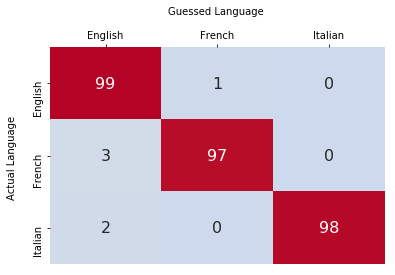

In [37]:
# Convert solution_dict and result_dict to arrays as needed to feed into the confusion_matrix
solution_list = list(solution_dict.values())
result_list = list(result_dict.values())

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn # Plot rectangular data as a color-encoded matrix.
from matplotlib.colors import ListedColormap # To change the color of seaborn heatmap

df_cm = pd.DataFrame(confusion_matrix(solution_list, result_list, labels=['English', 'French', 'Italian']), index=['English', 'French', 'Italian'], columns=['English', 'French', 'Italian'])

sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='coolwarm', center=10, cbar=False)
plt.ylabel('Actual Language \n')
plt.xlabel('Guessed Language \n')
ax = plt.gca() # Get current axes. This is the Axes object that is created by default when we make our figure
ax.xaxis.tick_top() # Move x-axis ticks to the top
ax.xaxis.set_label_position('top') # Move x-axis label to the top

This shows that English represented the majority of incorrect guesses.

# 3. Testing with our own sentence

Let's quickly test this with our own English sentence and see if it will classify it properly. 

In [38]:
sent = "This is a sentence."
sent_tokens = punct_dig_tokenizer(sent)
sent_bigrams_pre = ngrams(sent_tokens, 2, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_')
sent_bigrams = []
sent_bigrams_first_words = []
for b in sent_bigrams_pre:
    sent_bigrams.append(' '.join(b))
    sent_bigrams_first_words.append(b[0])
print('Sentence bigrams:', sent_bigrams)
print('Sentence bigrams first words:', sent_bigrams_first_words)

Sentence bigrams: ['_ this', 'this is', 'is a', 'a sentence', 'sentence _']
Sentence bigrams first words: ['_', 'this', 'is', 'a', 'sentence']


In [39]:
sent_english_prob = get_language_probability(sent_bigrams, sent_bigrams_first_words, bigram_english_dict, unigram_english_dict)
sent_french_prob = get_language_probability(sent_bigrams, sent_bigrams_first_words, bigram_french_dict, unigram_french_dict)
sent_italian_prob = get_language_probability(sent_bigrams, sent_bigrams_first_words, bigram_italian_dict, unigram_italian_dict)
print("RAW 'PROBABILITIES'")
print('English:', sent_english_prob)
print('French:', sent_french_prob)
print('Italian:', sent_italian_prob)

RAW 'PROBABILITIES'
English: 1.9126984421503714e-18
French: 1.617026466248148e-22
Italian: 1.5836803887663023e-22


## Normalize the Probabilities
Let's convert them to percentages.

In [40]:
def get_normalized_probabilities(list_of_probabilities):
    sum_of_probabilities = sum(list_of_probabilities)
    result = []
    
    for probability in list_of_probabilities:
        result.append(probability / sum_of_probabilities)
        
    return result

In [41]:
probabilities = [sent_english_prob, sent_french_prob, sent_italian_prob]
normalized_probabilities = get_normalized_probabilities(probabilities)

print('RELATIVE PROBABILITIES')

for i in range(len(probabilities)):
    print(lang_list[i], ': ', round(normalized_probabilities[i] * 100, 2), '%', sep='') # sep removes the space before the % sign

RELATIVE PROBABILITIES
English: 99.98%
French: 0.01%
Italian: 0.01%


This was correctly classified as English!